In [1]:
# let's install Feature-engine
!pip install feature-engine==1.0.2

     |████████████████████████████████| 153kB 4.6MB/s 
     |████████████████████████████████| 9.5MB 35.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# carregando o conjunto de dados Santander customer satisfaction
df = pd.read_csv('/content/drive/MyDrive/projeto-ia-codigos/projeto-ia-datasets/santander-customer-satisfaction.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
df.shape

(76020, 371)

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [ ]:
# checagem de missing values: não há valores faltantes

[x for x in X_train.columns if X_train[x].isnull().sum() > 0]

[]

## Removendo Features Constantes

Possuem apenas 1 valor para todas as observações (linhas) da ABT.

In [ ]:
from feature_engine.selection import DropConstantFeatures

# com tol=1 nós queremos que todas as features constantes
# sejam removidas
constant = DropConstantFeatures(tol=1)

# encontra as features constantes no dataset de treino
constant.fit(X_train)

DropConstantFeatures(missing_values='raise', tol=1,
                     variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                'imp_op_var39_comer_ult1',
                                'imp_op_var39_comer_ult3',
                                'imp_op_var40_comer_ult1',
                                'imp_op_var40_comer_ult3',
                                'imp_op_var40_efect_ult1',
                                'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
                                'imp_op_var41_comer_ult1',
                                'imp_op_var41_comer_ult3',
                                'imp_op_var41_efect_ult1',
                                'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                'imp_op_var39_efect_ult1',
                                'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1',
                          

In [ ]:
# as features constantes podem ser encontradas
# acessando o atributo features_to_drop_
len(constant.features_to_drop_)

38

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as constantes: ', X_train.shape[1])

X_train = constant.transform(X_train)
X_test = constant.transform(X_test)

print('Número de features depois de remover as constantes: ', X_train.shape[1])

Número de features antes de remover as constantes:  369
Número de features depois de remover as constantes:  331


## Removendo Features Quasi-constantes

Possuem apenas um valor para quase todas as linhas da ABT.

In [ ]:
from feature_engine.selection import DropConstantFeatures

# com tol=0.988 nós queremos que todas as features que 
# apresentem o mesmo valor para mais que 99.8% das linhas
quasi_constant = DropConstantFeatures(tol=0.998)

# encontra as features quasi-constantes no dataset de treino
quasi_constant.fit(X_train)

DropConstantFeatures(missing_values='raise', tol=0.998,
                     variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                'imp_op_var39_comer_ult1',
                                'imp_op_var39_comer_ult3',
                                'imp_op_var40_comer_ult1',
                                'imp_op_var40_comer_ult3',
                                'imp_op_var40_efect_ult1',
                                'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
                                'imp_op_var41_comer_ult1',
                                'imp_op_var41_comer_ult3',
                                'imp_op_var41_efect_ult1',
                                'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                'imp_op_var39_efect_ult1',
                                'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1',
                      

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as quase-constantes: ', X_train.shape[1])

X_train = quasi_constant.transform(X_train)
X_test = quasi_constant.transform(X_test)

print('Número de features depois de remover as quase-constantes: ', X_train.shape[1])

Número de features antes de remover as constantes:  331
Número de features depois de remover as constantes:  192


## Remove Feature Duplicadas

In [ ]:
from feature_engine.selection import DropDuplicateFeatures

duplicates = DropDuplicateFeatures()

duplicates.fit(X_train)

DropDuplicateFeatures(missing_values='ignore',
                      variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                 'imp_op_var39_comer_ult1',
                                 'imp_op_var39_comer_ult3',
                                 'imp_op_var40_comer_ult1',
                                 'imp_op_var40_comer_ult3', 'imp_op_var40_ult1',
                                 'imp_op_var41_comer_ult1',
                                 'imp_op_var41_comer_ult3',
                                 'imp_op_var41_efect_ult1',
                                 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                 'imp_op_var39_efect_ult1',
                                 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                 'ind_var1_0', 'ind_var1', 'ind_var5_0',
                                 'ind_var5', 'ind_var8_0', 'ind_var8',
                                 'ind_var12_0', 'ind_var12', 'ind_var13_0'

In [ ]:
# podemos ver as features duplicadas acessando
# o atributes duplicated_feature_sets_

duplicates.duplicated_feature_sets_

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [ ]:
# acessando as features que serão removidas
duplicates.features_to_drop_

{'ind_var25',
 'ind_var26',
 'ind_var37',
 'ind_var39',
 'num_var25',
 'num_var26',
 'num_var37',
 'num_var39'}

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as duplicadas: ', X_train.shape[1])

X_train = duplicates.transform(X_train)
X_test = duplicates.transform(X_test)

print('Número de features depois de remover as duplicadas: ', X_train.shape[1])

Número de features antes de remover as duplicadas:  192
Número de features depois de remover as duplicadas:  184


## Removendo Features Correlacionadas

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures

# examinando todas as variáveis e buscando os conjuntos de features
# com coeficiente de pearson (correlação) acima de 0.8
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
correlated.fit(X_train)

DropCorrelatedFeatures(method='pearson', missing_values='ignore', threshold=0.8,
                       variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                  'imp_op_var39_comer_ult1',
                                  'imp_op_var39_comer_ult3',
                                  'imp_op_var40_comer_ult1',
                                  'imp_op_var40_comer_ult3',
                                  'imp_op_var40_ult1',
                                  'imp_op_var41_comer_ult1',
                                  'imp_op_var41_comer_ult3',
                                  'imp_op_var41_efect_ult1',
                                  'imp_op_var41_efect_ult3',
                                  'imp_op_var41_ult1',
                                  'imp_op_var39_efect_ult1',
                                  'imp_op_var39_efect_ult3',
                                  'imp_op_var39_ult1', 'ind_var1_0', 'ind_var1',
                                  'ind_var5_0

In [ ]:
# acessando os conjuntos de variáveis 
# correlacionadas encontradas

correlated.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'},
 {'imp_op_var40_ult1', 'saldo_var40'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_efect_ult3',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_efect_ult3',
  'imp_op_var41_ult1'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5_0',
  'ind_var8',
  'ind_var8_0',
  'num_var5_0',
  'num_var8',
  'num_var8_0'},
 {'ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var42', 'num_var5'},
 {'ind_var12', 'ind_var12_0', 'num_var12', 'num_var12_0', 'num_var42_0'},
 {'ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_largo',
  'ind_var13_largo_0',
  'num_meses_var13_largo_ult3',
  'num

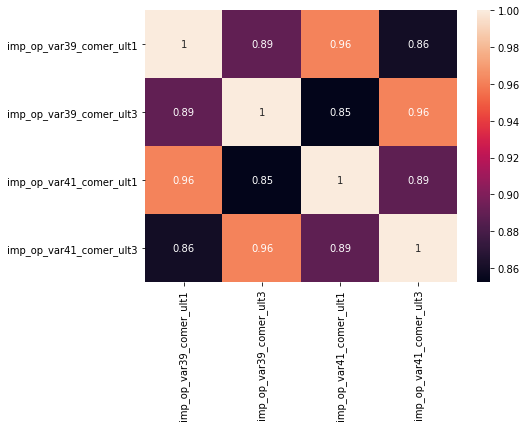

In [ ]:
# matriz de correlação para o primeiro grupo de features 
# correlacionadas encontradas
corrmat = X_train[['imp_op_var39_comer_ult1',
                   'imp_op_var39_comer_ult3',
                   'imp_op_var41_comer_ult1',
                   'imp_op_var41_comer_ult3']].corr(method='pearson')

fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(corrmat, annot=True)

Podemos ver que de fato todas as variáveis mostram uma correlação maior que 0.8 com cada uma.

In [ ]:
# acessando as features que serão removidas
len(correlated.features_to_drop_)

103

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as correlacionadas: ', X_train.shape[1])

X_train = correlated.transform(X_train)
X_test = correlated.transform(X_test)

print('Número de features depois de remover as correlacionadas: ', X_train.shape[1])

Número de features antes de remover as correlacionadas:  184
Número de features depois de remover as correlacionadas:  81


## Removendo Features Correlacionadas de Forma Inteligente

Com essa técnica, a feature selecionada do grupo de features correlacionadas tem os seguintes fatores levados em conta:

- quantidade de missing values
- variância
- cardinalidade
- feature importance extraída de um modelo

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection

smart_corr = SmartCorrelatedSelection(
    variables=None, # usa todas as variáveis
    method="pearson", # método de correlação
    threshold=0.7, # threshold
    missing_values="ignore",
    selection_method="model_performance", # forma de selecionar as features
    estimator=RandomForestClassifier(n_estimators=10, random_state=1), # modelo para extrair a importância
)

smart_corr.fit(X_train, y_train)

SmartCorrelatedSelection(cv=3,
                         estimator=RandomForestClassifier(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='gini',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                    

In [ ]:
# acessando o grupo de features correlacionadas
smart_corr.correlated_feature_sets_

[{'imp_op_var39_comer_ult1', 'num_op_var41_ult1'},
 {'ind_var1_0', 'var21'},
 {'ind_var5_0', 'num_meses_var8_ult3'},
 {'ind_var5', 'num_var30'},
 {'ind_var12_0', 'ind_var24_0', 'num_var30_0'},
 {'ind_var13_largo_0', 'saldo_var13_largo'},
 {'ind_var31_0', 'num_var31_0'},
 {'num_op_var40_comer_ult1', 'num_op_var40_ult1'},
 {'saldo_medio_var5_ult3', 'saldo_var5'},
 {'saldo_var12', 'saldo_var30'},
 {'delta_imp_aport_var13_1y3', 'imp_aport_var13_ult1', 'num_aport_var13_ult1'},
 {'imp_aport_var13_hace3', 'num_aport_var13_hace3'},
 {'imp_trans_var37_ult1', 'imp_var43_emit_ult1'},
 {'num_var22_hace2', 'num_var22_ult3'},
 {'num_med_var45_ult3', 'num_var45_hace3'}]

In [ ]:
# Vamos examinar a performance de uma random forest
# usando as features do quinto grupo de features correlacionadas
# encontradas acima

# pegando as 5 features
group_of_features = smart_corr.correlated_feature_sets_[4]

# build random forest with cross validation for
# each feature

for feature in group_of_features:
    
    model = cross_validate(RandomForestClassifier(n_estimators=10, random_state=1),
                           X_train[feature].to_frame(),
                           y_train,
                           cv=3,
                           return_estimator=False,
                           scoring='roc_auc'
    )

    print(f"{feature}: {model['test_score'].mean()}")

ind_var24_0: 0.5146970048562627
ind_var12_0: 0.5231394976032572
num_var30_0: 0.5346497482186976


A feature **num_var30_0** apresenta a maior `auc`, logo essa variável será a mantida e as outras removidas.

In [ ]:
# checando se a feature num_var30_0 não será realmente removida
'num_var30_0' in smart_corr.features_to_drop_

False

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as correlacionadas: ', X_train.shape[1])

X_train = smart_corr.transform(X_train)
X_test = smart_corr.transform(X_test)

print('Número de features depois de remover as correlacionadas: ', X_train.shape[1])

Número de features antes de remover as correlacionadas:  81
Número de features depois de remover as correlacionadas:  64


## Usando um Pipeline

Podemos colocar os passos descritos acima em 1 pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/santander-customer-satisfaction.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [ ]:
pipe = Pipeline([
    # remove constante e quasi-constantes features
    ('constant', DropConstantFeatures(tol=0.998)),
    # remove duplicados
    ('duplicated', DropDuplicateFeatures()), 
    # remove features correlacionadas
    ('correlation', SmartCorrelatedSelection(threshold=0.8,
                                             selection_method="model_performance",
                                             estimator=RandomForestClassifier(n_estimators=10, random_state=1)))
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('constant',
                 DropConstantFeatures(missing_values='raise', tol=0.998,
                                      variables=['var3', 'var15',
                                                 'imp_ent_var16_ult1',
                                                 'imp_op_var39_comer_ult1',
                                                 'imp_op_var39_comer_ult3',
                                                 'imp_op_var40_comer_ult1',
                                                 'imp_op_var40_comer_ult3',
                                                 'imp_op_var40_efect_ult1',
                                                 'imp_op_var40_efect_ult3',
                                                 'imp_op_var40_ult1',
                                                 'imp_op_var41_comer_ult1',
                                                 'imp_op...
                                                     'imp_op_var41_efect_ult1

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de aplicar o pipeline de seleção: ', X_train.shape[1])

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

print('Número de features depois de aplicar o pipeline de seleção: ', X_train.shape[1])

Número de features antes de aplicar o pipeline de seleção:  369
Número de features depois de aplicar o pipeline de seleção:  81




## Selecionando Features por Shuffling

Vamos construir um modelo com todas as features e então aleatorizar (shuffle) cada feature. A cada feature aleatorizada, treinamos o modelo novamente e se houver uma grande perda de performance, significa que essa feature é muito importante para o modelo. Se a perda de performance for pequena, podemos remover a feature. Por padrão o threshold é setado para None, o que significa que o valor dele é a performance média de cada iteração.



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/santander-customer-satisfaction.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train, y_train)

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
from feature_engine.selection import SelectByShuffling

shuffle = SelectByShuffling( 
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1), 
    scoring="roc_auc", 
    cv=3
)

shuffle.fit(X_train, y_train)

SelectByShuffling(cv=3,
                  estimator=RandomForestClassifier(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=2,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                 

In [ ]:
# roc_auc usando todas as variáveis
shuffle.initial_model_performance_

0.7675761929904802

In [ ]:
# acessando o impacto de cada feature aleatorizada 
# na performance do modelo pelo atributo performance_drifts
shuffle.performance_drifts_

{'delta_imp_aport_var13_1y3': -0.0039048335433380377,
 'delta_num_aport_var13_1y3': -0.0039048335433380377,
 'imp_aport_var13_hace3': -0.0039048335433380377,
 'imp_aport_var13_ult1': -0.0039048335433380377,
 'imp_ent_var16_ult1': -0.0039048335433380377,
 'imp_op_var39_comer_ult1': -0.0039048335433380377,
 'imp_op_var39_comer_ult3': -0.0039048335433380377,
 'imp_op_var39_efect_ult1': -0.0039048335433380377,
 'imp_op_var39_efect_ult3': -0.0018238808225206071,
 'imp_op_var39_ult1': -0.0039048335433380377,
 'imp_op_var40_comer_ult1': -0.0039048335433380377,
 'imp_op_var40_comer_ult3': -0.0039048335433380377,
 'imp_op_var40_ult1': -0.0039048335433380377,
 'imp_op_var41_comer_ult1': -0.0039048335433380377,
 'imp_op_var41_comer_ult3': -0.004024463603937933,
 'imp_op_var41_efect_ult1': -0.0031632361557651922,
 'imp_op_var41_efect_ult3': -0.0002799360544747387,
 'imp_op_var41_ult1': -0.003916347362536765,
 'imp_trans_var37_ult1': -0.0037798241392178467,
 'imp_var43_emit_ult1': -0.00390483354333

In [ ]:
# quantidade de features a serem dropadas
len(shuffle.features_to_drop_)

169

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes da remoção por shuffle: ', X_train.shape[1])

X_train = shuffle.transform(X_train)
X_test = shuffle.transform(X_test)

print('Número de features depois da remoção por shuffle: ', X_train.shape[1])

Número de features antes da remoção por shuffle:  184
Número de features depois da remoção por shuffle:  15


In [ ]:
# treinando uma random forest usando apenas as features selecionadas
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

rf.fit(X_train, y_train)

pred = rf.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train roc-auc: 0.791924562203957
Test roc-auc: 0.7888173732118804


O modelo com menos features tem uma performance superior que o modelo com todas as variáveis.

## Selecionando Features por Performance Univariada

Construimos um modelo por feature e selecionamos aquelas features que retornam modelos com performance acima de um certo threshold.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/santander-customer-satisfaction.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train, y_train)

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
from feature_engine.selection import SelectBySingleFeaturePerformance

sel = SelectBySingleFeaturePerformance(
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1), # the model
    scoring="roc_auc", 
    cv=3, 
    threshold=None
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=3,
                                 estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=2,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,
                      

In [ ]:
# acessando a performance de cada feature sozinha
sel.feature_performance_

{'delta_imp_aport_var13_1y3': 0.5120077456941585,
 'delta_num_aport_var13_1y3': 0.5118510970310881,
 'imp_aport_var13_hace3': 0.5105633802816901,
 'imp_aport_var13_ult1': 0.5009342728609799,
 'imp_ent_var16_ult1': 0.5006955094143339,
 'imp_op_var39_comer_ult1': 0.5075504823753088,
 'imp_op_var39_comer_ult3': 0.5109389082825512,
 'imp_op_var39_efect_ult1': 0.5179100750635618,
 'imp_op_var39_efect_ult3': 0.5167694782992768,
 'imp_op_var39_ult1': 0.5228100155373502,
 'imp_op_var40_comer_ult1': 0.5001164460497465,
 'imp_op_var40_comer_ult3': 0.5000491427552901,
 'imp_op_var40_ult1': 0.5007062151642744,
 'imp_op_var41_comer_ult1': 0.5072222194196698,
 'imp_op_var41_comer_ult3': 0.512288911757716,
 'imp_op_var41_efect_ult1': 0.5179918115025716,
 'imp_op_var41_efect_ult3': 0.5168066681688348,
 'imp_op_var41_ult1': 0.5236644997331971,
 'imp_trans_var37_ult1': 0.5210760904170647,
 'imp_var43_emit_ult1': 0.5006130302989539,
 'imp_var7_recib_ult1': 0.49994207124312257,
 'ind_var1': 0.502040314154

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as constantes: ', X_train.shape[1])

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

print('Número de features depois de remover as constantes: ', X_train.shape[1])

Número de features antes de remover as constantes:  184
Número de features depois de remover as constantes:  28


In [ ]:
# treinando uma random forest usando apenas as features selecionadas
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train roc-auc: 0.7801826712957357
Test roc-auc: 0.7714129308349202


## Selecionando Features por Performance Recursiva

Esse método realiza os seguintes passos:
1. Cria um modelo com todas as features
2. Ranqueia as features pela feature importance do modelo
3. Remove a menos importante
4. Treina um novo modelo e avalia a performance
5. e a queda na performance é grande, a feature é mantida. Se não, ela é removida.
6. Repete os passos 3-5 até todas as features terem sido avaliadas.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/santander-customer-satisfaction.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train, y_train)

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
from feature_engine.selection import RecursiveFeatureElimination

rfe = RecursiveFeatureElimination(
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1),
    scoring="roc_auc",
    cv=3,
    threshold = 0.04
)

rfe.fit(X_train, y_train)

RecursiveFeatureElimination(cv=3,
                            estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=2,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,


The model begins by removing features, 1 by 1, from those on the left, to those on the right.

In [ ]:
# performance usando todas as features
rfe.initial_model_performance_

0.7675761929904802

In [ ]:
# queda na performance removendo cada feature
rfe.performance_drifts_

{'delta_imp_aport_var13_1y3': 0.04543850975960817,
 'delta_num_aport_var13_1y3': 0.04543850975960817,
 'imp_aport_var13_hace3': 0.04543850975960817,
 'imp_aport_var13_ult1': 0.04543850975960817,
 'imp_ent_var16_ult1': -0.031631525462869625,
 'imp_op_var39_comer_ult1': 0.0124124202393604,
 'imp_op_var39_comer_ult3': 0.010838955253328453,
 'imp_op_var39_efect_ult1': -0.023945890000941716,
 'imp_op_var39_efect_ult3': 0.012811027258745056,
 'imp_op_var39_ult1': -0.004590398567783538,
 'imp_op_var40_comer_ult1': -0.018470725659272436,
 'imp_op_var40_comer_ult3': 0.03770020032644106,
 'imp_op_var40_ult1': -0.03539264879310866,
 'imp_op_var41_comer_ult1': 0.008917819636699464,
 'imp_op_var41_comer_ult3': -0.021592993170740704,
 'imp_op_var41_efect_ult1': -0.00778530823591661,
 'imp_op_var41_efect_ult3': -0.001221254220643786,
 'imp_op_var41_ult1': 0.00906016127007181,
 'imp_trans_var37_ult1': 0.04501451161601899,
 'imp_var43_emit_ult1': 0.04543850975960817,
 'imp_var7_recib_ult1': 0.045438509

In [ ]:
len(rfe.features_to_drop_)

83

In [ ]:
# removendo as features constantes - transform method
print('Número de features antes de remover as constantes: ', X_train.shape[1])

X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

print('Número de features depois de remover as constantes: ', X_train.shape[1])

Número de features antes de remover as constantes:  184
Número de features depois de remover as constantes:  101


In [ ]:
# treinando uma random forest usando apenas as features selecionadas
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train roc-auc: 0.7851458980722924
Test roc-auc: 0.7727332676704939


## Juntando tudo em um Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/santander-customer-satisfaction.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','TARGET'], axis=1),
                                                    df['TARGET'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), 
    ('duplicated', DropDuplicateFeatures()),
    ('shuffle', SelectByShuffling(estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1),
                                  scoring="roc_auc", 
                                  cv=3)),
    ('random_forest', RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1)),
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('constant',
                 DropConstantFeatures(missing_values='raise', tol=0.998,
                                      variables=['var3', 'var15',
                                                 'imp_ent_var16_ult1',
                                                 'imp_op_var39_comer_ult1',
                                                 'imp_op_var39_comer_ult3',
                                                 'imp_op_var40_comer_ult1',
                                                 'imp_op_var40_comer_ult3',
                                                 'imp_op_var40_efect_ult1',
                                                 'imp_op_var40_efect_ult3',
                                                 'imp_op_var40_ult1',
                                                 'imp_op_var41_comer_ult1',
                                                 'imp_op...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
      

In [ ]:
pred = pipe.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = pipe.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train roc-auc: 0.7759405645909844
Test roc-auc: 0.7697837874091272


## Referências

- [Feature Engine Library](https://feature-engine.readthedocs.io/en/latest/index.html)
- [Kaggle Notebook Feature Selection with Feature Engine](https://www.kaggle.com/solegalli/feature-selection-with-feature-engine)